## Importing required packages 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Loading file 

In [2]:
df = pd.read_csv(file_path) 

In [3]:
def plot_clusters(X, clusters, title="Clustering Results"):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X.toarray())
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    for i, txt in enumerate(X):
        plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))
    
    plt.title(title)
    plt.colorbar()
    plt.show()

In [4]:
df.head()

,No,Sentences,Subject of comparison,Object of comparison,Nature,Categories,Feature matching,Symmetry,Salience,"Broad, unifying concept",Domain incongruence,Gold
0,1,Tom is as fast as a leopard.,Tom,a leopard,Qualitative,"Different basic level category (human, animal)",More prominent differences,Asymmetrical,High salience in object of comparison,Meaningful,Distinct,Simile
1,2,"But he’s no fool, even if he is as obstinate a...",He,a mule,Qualitative,"Different basic level category (human, animal)",More prominent differences,Asymmetrical,High salience in object of comparison,Meaningful,Distinct,Simile
2,3,I was as cool as a cucumber.,I,cucumber,Qualitative,"Different basic level category (human, fruit)",More prominent differences,Asymmetrical,High salience in object of comparison,Meaningful,Distinct,Simile
3,4,He paid as much as a million dollars for the p...,He,-,-,-,-,-,-,-,-,Not Applicable
4,5,The wicked flee when no one pursues; but the r...,Righteous,a lion,Qualitative,"Different basic level category (human, animal)",More prominent differences,Asymmetrical,High salience in object of comparison,Meaningful,Distinct,Simile


## Preparing the dataset 

In [5]:
data= df["Sentences"]
data

0                          Tom is as fast as a leopard.
1     But he’s no fool, even if he is as obstinate a...
2                          I was as cool as a cucumber.
3     He paid as much as a million dollars for the p...
4     The wicked flee when no one pursues; but the r...
                            ...                        
95           He always keeps his room as neat as a pin.
96                He is as stubborn as a Missouri Mule.
97                 The surface was as flat as a mirror.
98    It allows very poor people, who don't qualify ...
99                          Tom is as gentle as a lamb.
Name: Sentences, Length: 100, dtype: object

## Word-level vectorization using Bag-Of-Words 

In [6]:
word_vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')
X_word = word_vectorizer.fit_transform(data)

In [7]:
print(f"Shape of X_word: {X_word.shape}")

Shape of X_word: (100, 1725)


In [8]:
X_word

<100x1725 sparse matrix of type '<class 'numpy.int64'>'
	with 2434 stored elements in Compressed Sparse Row format>

## Character-level vectorization using Bag-Of-Words

In [11]:
char_vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='char')
X_char = char_vectorizer.fit_transform(data) 

## K-means clustering model training on word unigrams and bigrams 

In [12]:
clusters = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_word)

In [13]:
print("Cluster labels:", clusters.labels_)

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1]


## K-means clustering model training on character unigrams and bigrams 

In [14]:
clusters = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X_char)

In [15]:
print("Cluster labels:", clusters.labels_)

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Word-level vectorization using Tf-Idf 

In [16]:
word_vectorizer = TfidfVectorizer(ngram_range=(1,2), analyzer='word')
X_word = word_vectorizer.fit_transform(data)

## K-means clustering model training on character unigrams and bigrams 

In [23]:
clusters = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X_word)

In [21]:
print("Cluster labels:", clusters.labels_)

Cluster labels: [1 2 1 0 2 2 2 1 1 1 1 1 1 1 0 2 1 0 0 2 1 0 0 0 2 1 1 0 1 0 0 1 0 2 1 0 0
 2 2 1 1 1 0 0 2 1 1 1 0 1 0 2 0 2 0 1 1 1 2 0 2 1 0 1 0 0 0 2 0 1 1 2 1 1
 2 0 1 1 2 2 1 1 0 2 1 1 0 2 2 1 1 1 2 1 1 2 2 0 0 1]


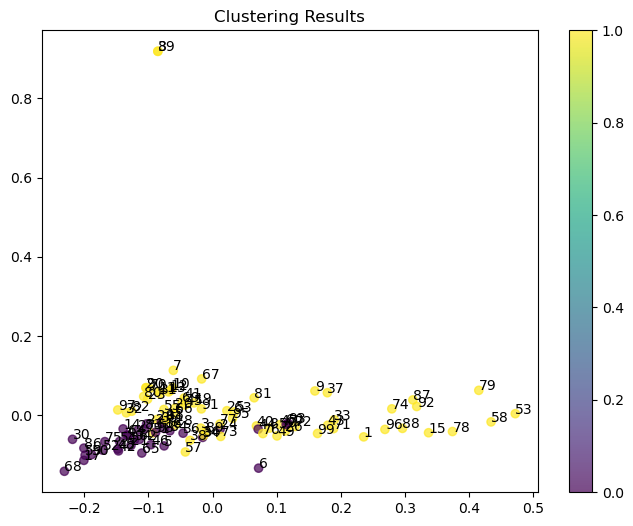

In [24]:
plot_clusters(X_word, clusters.labels_)